**Required libraries/modules**

In [1]:
# remember to use the below line to install "surprise" module in the anaconda prompt
# conda install -c conda-forge scikit-surprise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader

# 1. Load data

In [3]:
full_df = pd.read_csv('data/full_data_cleaned.csv')

In [4]:
full_df.head(2)

,author_id,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,...,price_usd_x,brand_id,ingredients,limited_edition,out_of_stock,sephora_exclusive,highlights,primary_category,num_rating,niche_product
0,1238130325,4,1.0,NaN,0,0,0,3/12/23,I love this lippy…it makes my lips soft and al...,Yumm,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0
1,27991208736,3,1.0,0.0,1,1,0,3/9/23,ive tried my friend’s a few times and it does ...,overrated/overpriced,...,24.0,6125,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,1227,0


# 2. Demonstrate data structure

In [5]:
# convert data from sparse representation to dense matrix representation (full matrix)
rating_df = full_df.pivot(index='author_id',
                                 columns='product_id',
                                 values='rating_x')
# view data
rating_df.fillna(0).astype(int)

product_id,P114902,P12045,P122718,P122762,P122774,P122900,P12295,P12336,P12573,P126301,...,P505452,P505711,P54509,P6028,P7880,P91627362,P94421,P94812,P9940,P9941
author_id,,,,,,,,,,,,,,,,,,,,,
10000117144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000217994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000290716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000427309,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000593839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
orderGen1221842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
orderGen1254820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
orderGen1698648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3. Prepare data in the matrix format

In [6]:
# define a range of rating
reader = Reader(rating_scale=(1, 5))
# loading the dataset from a pandas DataFrame to be used with surprise's recommendation algorithms.
data = Dataset.load_from_df(full_df[['author_id',
                                       'product_id',
                                       'rating_x']], reader)
trainset = data.build_full_trainset()

# 4. Check data sparsity

In [7]:
# count number of users, items, and ratings
num_users = trainset.n_users
num_items = trainset.n_items
num_ratings = trainset.n_ratings
mean_ = np.around(trainset.global_mean, decimals=2)
print('this dataset has ', num_users, 'users')
print('this dataset has ', num_items, 'items')
print('this dataset has ', num_ratings, 'ratings')
print('Average rating value: ', mean_)

this dataset has  75684 users
this dataset has  1764 items
this dataset has  424374 ratings
Average rating value:  4.38


In [8]:
# calculate data density and sparsity
density_ = num_ratings / (num_users * num_items)
density_ = np.round(density_, decimals = 10)
sparsity_ =  1 - density_

# print result of density and sparsity
print('density: ', density_ * 100, ' %')
print('sparsity: ', sparsity_ * 100, ' %')

density:  0.31786749000000003  %
sparsity:  99.68213251  %


# 5. Summary of statistics

In [9]:
full_df['submission_time']

0         3/12/23
1          3/9/23
2          3/7/23
3          3/5/23
4          3/4/23
           ...   
424369    3/13/23
424370    3/13/23
424371    3/13/23
424372    3/13/23
424373    3/13/23
Name: submission_time, Length: 424374, dtype: object

In [10]:
# convert the 'Date' column to datetime format
full_df['submission_time']= pd.to_datetime(full_df['submission_time'], format='%m/%d/%y')
# create a new column to store year of rating
full_df.loc[:, "year"] = full_df['submission_time'].dt.year
# convert to year to integer
full_df.loc[:, "year"] = full_df["year"].astype(int)

In [11]:
# rating column name
full_df.columns

Index(['author_id', 'rating_x', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name_x', 'brand_name_x', 'price_usd_x',
       'brand_id', 'ingredients', 'limited_edition', 'out_of_stock',
       'sephora_exclusive', 'highlights', 'primary_category', 'num_rating',
       'niche_product', 'year'],
      dtype='object')

In [12]:
# calculate basic statistics
full_df.describe(include=[np.number])

,rating_x,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd_x,brand_id,limited_edition,out_of_stock,sephora_exclusive,num_rating,niche_product,year
count,424374.000000,395579.000000,195370.000000,424374.000000,424374.000000,424374.000000,424374.000000,424374.000000,424374.000000,424374.000000,424374.000000,424374.000000,424374.000000,424374.000000
mean,4.375402,0.865812,0.761172,3.598625,0.760612,2.838013,53.417636,5738.290524,0.023915,0.024669,0.360126,882.979513,0.229222,2020.273985
std,1.046725,0.340855,0.326536,21.086191,4.568092,18.638919,44.885075,1323.329745,0.152785,0.155115,0.480037,847.958999,0.420333,2.109311
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1063.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2008.000000
25%,4.000000,1.000000,0.615385,0.000000,0.000000,0.000000,27.000000,5715.000000,0.000000,0.000000,0.000000,268.000000,0.000000,2019.000000
50%,5.000000,1.000000,0.933333,0.000000,0.000000,0.000000,44.000000,6134.000000,0.000000,0.000000,0.000000,562.000000,0.000000,2021.000000
75%,5.000000,1.000000,1.000000,3.000000,0.000000,2.000000,65.000000,6285.000000,0.000000,0.000000,1.000000,1202.000000,0.000000,2022.000000
max,5.000000,1.000000,1.000000,5119.000000,1094.000000,4924.000000,449.000000,8017.000000,1.000000,1.000000,1.000000,3305.000000,1.000000,2023.000000


# 6. Visualization

## 6.1. Rating distribution

### Data for subplot 1

In [13]:
# create a list to store rating level
rating = [1, 2, 3, 4, 5]
# group rating_df to count number of observations per each rating level
grouped_df1 = full_df.groupby('rating_x')
# Get the size of each group
group_sizes = grouped_df1.size()
group_sizes

rating_x
1     16126
2     17657
3     32999
4     81590
5    276002
dtype: int64

### Data for subplot 2

In [14]:
# check unique values
full_df['is_recommended'].unique()

array([ 1.,  0., nan])

In [15]:
full_df['is_recommended'] = full_df['is_recommended'].fillna('Missing')

In [16]:
grouped_df2 = full_df.groupby(['rating_x', 'is_recommended']).size().unstack()
grouped_df2

is_recommended,0.0,1.0,Missing
rating_x,,,
1,14529,143,1454
2,15506,622,1529
3,19734,11055,2210
4,2925,73433,5232
5,388,257244,18370


### Data for subplot 3 and 4

In [17]:
# create a function to count the numbers of rating of each user or each product
def count_rating (old_var, new_var):
    # count the number rating per old variable
    grouped_df = full_df.groupby([old_var]).size()
    # sort by count in descending order so that user/product having most ratings comes first
    sorted_id = grouped_df.sort_values(ascending=False).index
    # create a mapping from old_var to a new_var
    old_to_new_id = {old_id: i+1 for i, old_id in enumerate(sorted_id)}
    # map the old_id to the new_id
    full_df[new_var] = full_df[old_var].map(old_to_new_id)
    # check the result
    grouped_df = full_df.groupby([new_var]).size()
    return grouped_df

In [18]:
user_rating_count = count_rating('author_id', 'user_id')
user_rating_count

user_id
1        263
2        158
3        147
4        145
5        142
        ... 
75680      1
75681      1
75682      1
75683      1
75684      1
Length: 75684, dtype: int64

In [19]:
product_rating_count = count_rating('product_id', 'new_product_id')
product_rating_count

new_product_id
1       3305
2       3305
3       3304
4       3304
5       3199
        ... 
1760       1
1761       1
1762       1
1763       1
1764       1
Length: 1764, dtype: int64

### Plot 1

In [20]:
# Reference for color
# https://matplotlib.org/stable/gallery/color/named_colors.html
# Reference for stacked bar plot (Plot 1.2)
# https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

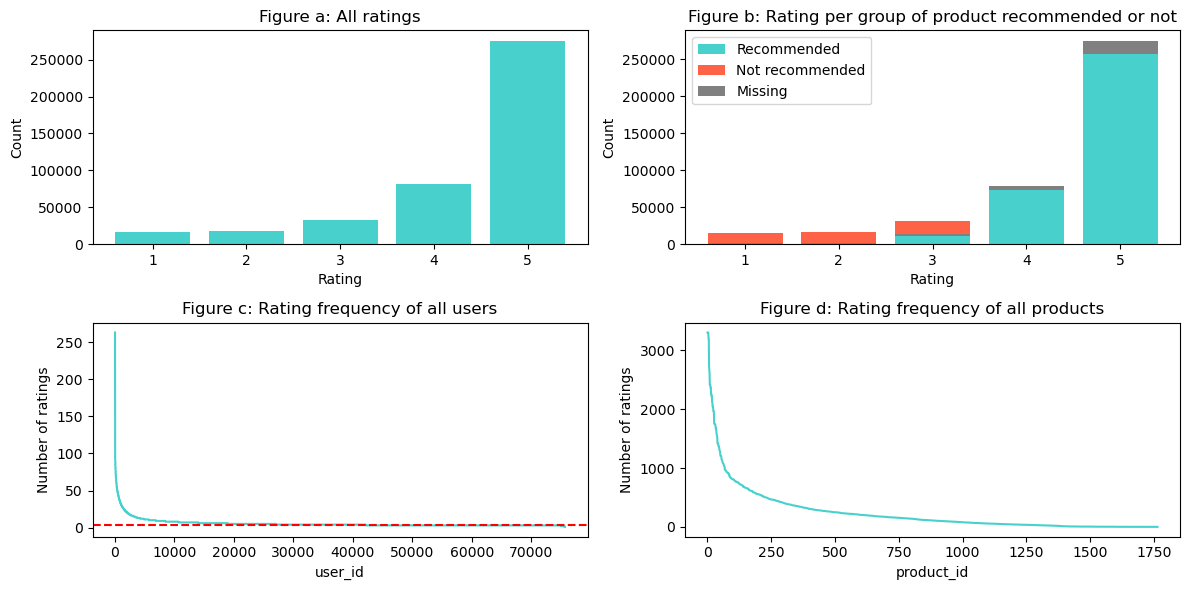

In [21]:
plt.style.use("seaborn-v0_8-deep")
# Create structure for the big plot
fig, ax = plt.subplots(2,2, figsize=(12, 6))

## Subplot 1
ax[0,0].bar(rating, group_sizes, color='mediumturquoise')
ax[0,0].set_title('Figure a: All ratings')
ax[0,0].set_xlabel('Rating')
ax[0,0].set_ylabel('Count')

## Subplot 2
ax[0,1].bar(rating, grouped_df2[1], color='mediumturquoise')
ax[0,1].bar(rating, grouped_df2[0], bottom=grouped_df2[1], color='tomato')
ax[0,1].bar(rating, grouped_df2['Missing'], bottom=grouped_df2[1], color='grey')
ax[0,1].set_title('Figure b: Rating per group of product recommended or not')
ax[0,1].set_xlabel('Rating')
ax[0,1].set_ylabel('Count')
ax[0,1].legend(["Recommended", "Not recommended", "Missing"])

## Subplot 3
ax[1,0].plot(user_rating_count, color='mediumturquoise')
ax[1,0].axhline(y=3, color='r', linestyle='--')  # Add horizontal line at y=10
ax[1,0].set_title('Figure c: Rating frequency of all users')
ax[1,0].set_xlabel('user_id')
ax[1,0].set_ylabel('Number of ratings')

## Subplot 4
ax[1,1].plot(product_rating_count, color='mediumturquoise')
ax[1,1].set_title('Figure d: Rating frequency of all products')
ax[1,1].set_xlabel('product_id')
ax[1,1].set_ylabel('Number of ratings')

plt.tight_layout()  # Adjust the layout to prevent overlaps
#plt.savefig('../picture/rating_distribution.png', dpi=900)
plt.show()

## 6.2. Rating distribution per each year

### Data for subplot 1

In [22]:
# create a new column to store year of rating
full_df["year"] = full_df['submission_time'].dt.year
# convert to year to integer
full_df["year"] = full_df["year"].astype(int)

In [23]:
# prepare data
grouped_df3 = full_df.groupby('year')
total_no_ratings = grouped_df3.size()
total_no_ratings

year
2008       297
2009       845
2010      1237
2011      1345
2012      1473
2013      1962
2014      2905
2015      4286
2016      6723
2017     13492
2018     27376
2019     47167
2020     85048
2021     99731
2022    103921
2023     26566
dtype: int64

### Data for subplot 2

In [24]:
# group rating_df to count number of observations per each year
grouped_df4 = full_df.groupby(['year', 'rating_x']).size().unstack(fill_value=0)
# view data
grouped_df4

rating_x,1,2,3,4,5
year,,,,,
2008,0,13,22,71,191
2009,26,27,61,146,585
2010,30,38,79,267,823
2011,46,34,94,307,864
2012,49,66,108,293,957
2013,117,80,117,415,1233
2014,167,162,230,538,1808
2015,250,260,338,694,2744
2016,342,371,555,1156,4299


In [25]:
# Calculate the sum for each year
year_totals = grouped_df4.sum(axis=1)
# Divide each count by the total count for each year and multiply by 100
grouped_df4_percentage = grouped_df4.divide(year_totals, axis=0) * 100

### Plot 2

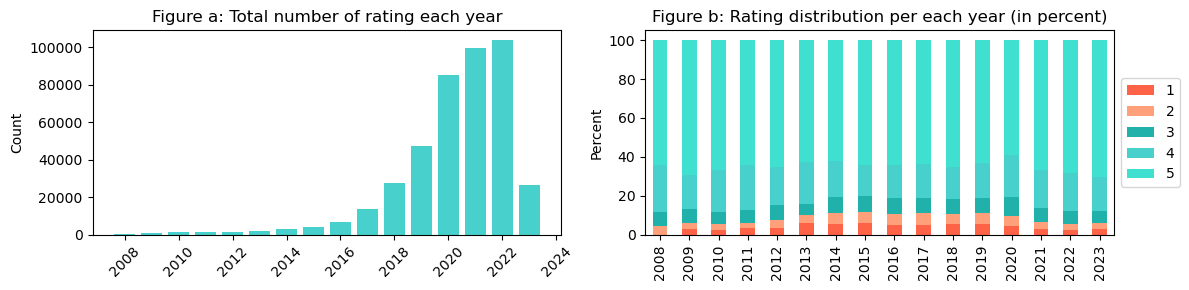

In [26]:
# Set the figure size and create two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# Plot 1
ax[0].bar(total_no_ratings.index,total_no_ratings, color = 'mediumturquoise')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Figure a: Total number of rating each year')

# Plot 2
grouped_df4_percentage.plot(kind='bar', stacked=True,
                        color=['tomato', 'lightsalmon', 'lightseagreen', 'mediumturquoise', 'turquoise'],
                        ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Percent')
ax[1].set_title('Figure b: Rating distribution per each year (in percent)')
ax[1].tick_params(axis='x', rotation=90)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # Adjust the layout to prevent overlaps
#plt.savefig('../picture/rating_per_year.png', dpi=900)
plt.show()

## 6.3. Rating distribution per products' information

### Data for subplot 1

In [27]:
# group rating by brand name
grouped_df5 = full_df.groupby('brand_name_x').size().reset_index(name='num_rating')
# Get the top 30 brands by 'num_rating'
top30_brands = grouped_df5.sort_values('num_rating', ascending=False).head(30).index
# Create a new column 'is_top30_brand' that is 1 if the brand is in top30_brands, and 0 otherwise
grouped_df5['is_top30_brand'] = np.where(grouped_df5.index.isin(top30_brands), 1, 0)
# view data - top 30 top brands
grouped_df5.sort_values('num_rating', ascending=False)

,brand_name_x,num_rating,is_top30_brand
110,Tatcha,23139,1
39,Glow Recipe,16915,1
125,fresh,14508,1
30,Farmacy,14488,1
17,Dermalogica,14396,1
...,...,...,...
48,INC.redible,32,0
100,Soleil Toujours,26,0
16,Danessa Myricks Beauty,14,0
124,caliray,7,0


In [28]:
# calculate the total number of ratings of top 30 brands
total_num_ratings = grouped_df5.groupby('is_top30_brand')['num_rating'].sum()
total_num_ratings

is_top30_brand
0    127672
1    296702
Name: num_rating, dtype: int64

In [29]:
# Calculate the percentage of 'num_rating' per 'is_top30_brand'
percentage_num_rating = np.round((total_num_ratings / len(full_df)) * 100, decimals = 2)
percentage_num_rating

is_top30_brand
0    30.08
1    69.92
Name: num_rating, dtype: float64

### Data for subplot 2

In [30]:
# sort brand name by number of ratings and select top 10 popular brands
top_10_brands = grouped_df5.sort_values('num_rating', ascending=False).head(10)[['brand_name_x','num_rating']]
# Set 'brand_name_x' as index
top_10_brands.set_index('brand_name_x', inplace=True)
top_10_brands

,num_rating
brand_name_x,
Tatcha,23139
Glow Recipe,16915
fresh,14508
Farmacy,14488
Dermalogica,14396
Youth To The People,13625
Drunk Elephant,12909
Sunday Riley,11858
CLINIQUE,11622


### Data for subplot 3

In [31]:
# create an array to store rating levels
rating_levels = np.sort(full_df['rating_x'].unique())
rating_levels

array([1, 2, 3, 4, 5])

### Data for subplot 4

In [32]:
# group rating by type of product edition
grouped_df6 = full_df.groupby(['limited_edition', 'rating_x']).size().unstack(fill_value=0)
grouped_df6

rating_x,1,2,3,4,5
limited_edition,,,,,
0,15706,17215,32068,79641,269595
1,420,442,931,1949,6407


### Data for subplot 5

In [33]:
# group rating by type of product exclusiveness
grouped_df7 = full_df.groupby(['sephora_exclusive', 'rating_x']).size().unstack(fill_value=0)
grouped_df7

rating_x,1,2,3,4,5
sephora_exclusive,,,,,
0,10180,10941,21484,54048,174893
1,5946,6716,11515,27542,101109


### Data for subplot 6

In [34]:
# Group by 'out_of_stock' and count unique 'product_id'
grouped_df8 = full_df.drop_duplicates(subset=['product_id', 'out_of_stock']).groupby('out_of_stock')['product_id'].nunique()
grouped_df8

out_of_stock
0    1700
1      64
Name: product_id, dtype: int64

### Plot 3

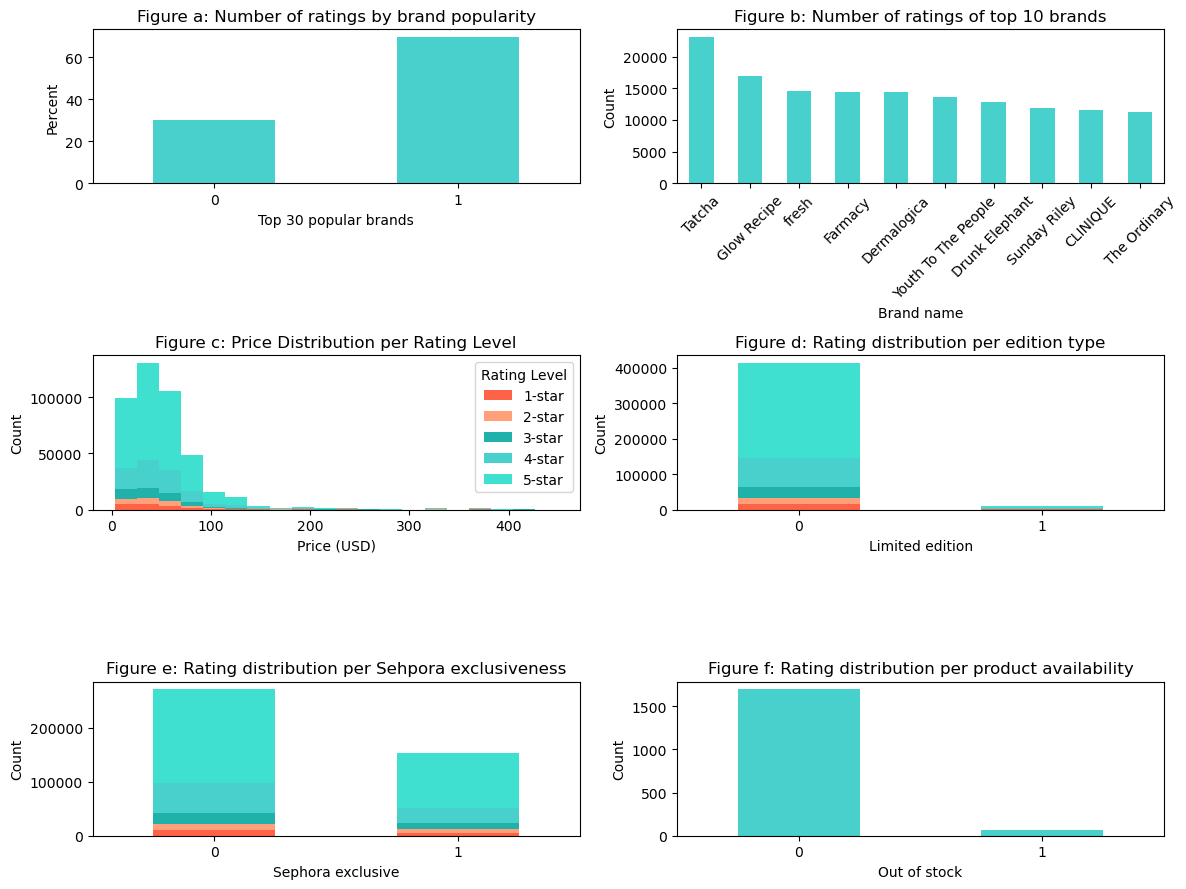

In [35]:
plt.style.use("seaborn-v0_8-deep")
# Set the figure size and create two subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 9))

# Subplot 1
percentage_num_rating.plot(kind='bar', ax=ax[0,0], color='mediumturquoise')
ax[0,0].set_xlabel('Top 30 popular brands')
ax[0,0].set_ylabel('Percent')
ax[0,0].set_title('Figure a: Number of ratings by brand popularity')
ax[0,0].tick_params(axis='x', rotation=360)

# Subplot 2
top_10_brands.plot(kind='bar', ax=ax[0,1], color='mediumturquoise')
ax[0,1].set_xlabel('Brand name')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Figure b: Number of ratings of top 10 brands')
ax[0,1].tick_params(axis='x', rotation=45)
ax[0,1].legend().remove()

# Subplot 3
# Specify the colors for the histograms
colors = ['tomato', 'lightsalmon', 'lightseagreen', 'mediumturquoise', 'turquoise']
# Prepare a list of data series for the histogram
data = [full_df[full_df['rating_x'] == rating]['price_usd_x'] for rating in rating_levels]
# Create a histogram for each rating level
ax[1,0].hist(data, bins=20, label=[f'{rating}-star' for rating in rating_levels], color=colors, stacked=True)
ax[1,0].set_xlabel('Price (USD)')
ax[1,0].set_ylabel('Count')
ax[1,0].set_title('Figure c: Price Distribution per Rating Level')
ax[1,0].legend(title='Rating Level')

# Subplot 4
grouped_df6.plot(kind='bar', stacked=True,ax=ax[1,1], color=colors)
ax[1,1].set_xlabel('Limited edition')
ax[1,1].set_ylabel('Count')
ax[1,1].set_title('Figure d: Rating distribution per edition type')
ax[1,1].tick_params(axis='x', rotation=360)
ax[1,1].legend().remove()

# Subplot 5
grouped_df7.plot(kind='bar', stacked=True,ax=ax[2,0], color=colors)
ax[2,0].set_xlabel('Sephora exclusive')
ax[2,0].set_ylabel('Count')
ax[2,0].set_title('Figure e: Rating distribution per Sehpora exclusiveness')
ax[2,0].tick_params(axis='x', rotation=360)
ax[2,0].legend().remove()

# Subplot 6
grouped_df8.plot(kind='bar', stacked=True,ax=ax[2,1], color='mediumturquoise')
ax[2,1].set_xlabel('Out of stock')
ax[2,1].set_ylabel('Count')
ax[2,1].set_title('Figure f: Rating distribution per product availability')
ax[2,1].tick_params(axis='x', rotation=360)
ax[2,1].legend().remove()

plt.tight_layout()  # Adjust the layout to prevent overlaps
#plt.savefig('../picture/rating_per_product_attribute.png', dpi=900)
plt.show()